Завдання:

1) Створення власного набору даних для класифікації:

Бінарна класифікація: Створіть набір даних, де кожен запис представляє два числові атрибути та бінарний класовий лейбл (наприклад, "0" або "1"). Ці дані можуть бути синтетичними та містити, наприклад, оцінки студентів та їхній успіх (пройшов/не пройшов).

Мультикласова класифікація: Розширте набір даних для включення більше ніж двох класів (наприклад, "низький", "середній", "високий").

2) Побудова нейронної мережі для класифікації:

Розробіть нейронну мережу з трьома повнозв'язними шарами для класифікації. Використовуйте відповідні функції активації (наприклад, ReLU для прихованих шарів та sigmoid для виходу в бінарній класифікації або softmax для мультикласової).

Навчіть модель на вашому власному наборі даних для класифікації (50 епох) та оцініть її ефективність.

3) Експерименти з покращенням результатів:

Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.

Збільште кількість нейронів у кожному шарі.

Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.

Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.

4) Візуалізація процесу навчання:

Здійсніть візуалізацію зміни функції втрат та точності на тренувальному та тестувальному наборах даних під час тренування моделі.

In [60]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Функція для візуалізації
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs - ' + title)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs - ' + title)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

# Генеруємо дані для X1, X2 та y_binary
num_samples = 1000
X = np.random.randn(num_samples, 2)  # Створення масиву X з двома колонками
noise = np.random.randn(num_samples, 2) / 3  # Генерування шуму

# Залежність між X1 та X2 з шумом
X[:, 1] = 0.5 * X[:, 0] + noise[:, 1]

# Формування бінарного класу на основі залежності між X1 та X2
y_binary = (X[:, 1] > X[:, 0]).astype(int)

# Формування мультикласового класу на основі залежності між X1 та X2
y_multi = np.zeros(num_samples, dtype=int)
y_multi[(X[:, 0] >= -0.3) & (X[:, 1] >= 0)] = 1  # середній
y_multi[(X[:, 0] <= -0.3) & (X[:, 1] <= -0.2)] = 0  # низький
y_multi[(X[:, 0] >= 0.4) & (X[:, 1] >= 0.3)] = 2  # високий

In [ ]:
# Бінарна класифікація
model_binary = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_binary = model_binary.fit(X[:800], y_binary[:800], epochs=50, validation_split=0.2, verbose=0)

# Мультикласова класифікація
model_multi = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_multi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_multi = model_multi.fit(X[:800], y_multi[:800], epochs=50, validation_split=0.2, verbose=0)

In [61]:
# Мультикласова класифікація_2
model_multi_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_multi_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_multi_2 = model_multi_2.fit(X[:800], y_multi[:800], epochs=50, validation_split=0.2, verbose=0)

In [63]:
print(model_multi.evaluate(X[800:], y_multi[800:]), "- first_multi")
print(model_multi_2.evaluate(X[800:], y_multi[800:]), "second_multi")

7/7 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9850
[0.07039035856723785, 0.9850000143051147] - first_multi
7/7 [==============================] - 0s 3ms/step - loss: 0.1375 - accuracy: 0.9400
[0.13754941523075104, 0.9399999976158142] second_multi


In [ ]:
# Бінарна класифікація_2
model_binary_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_binary_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_binary_improved = model_binary_2.fit(X[:800], y_binary[:800], epochs=300, validation_split=0.2, verbose=0, callbacks=[
    tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 if epoch < 100 else 0.0001)
])

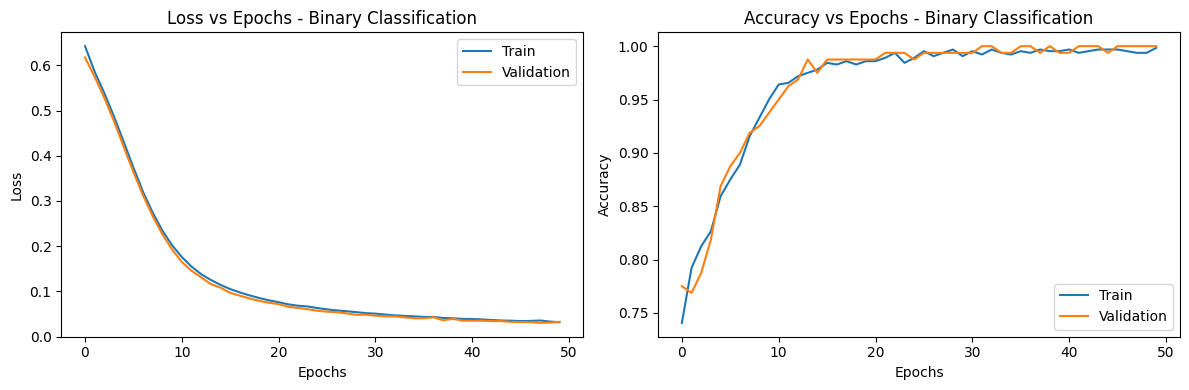

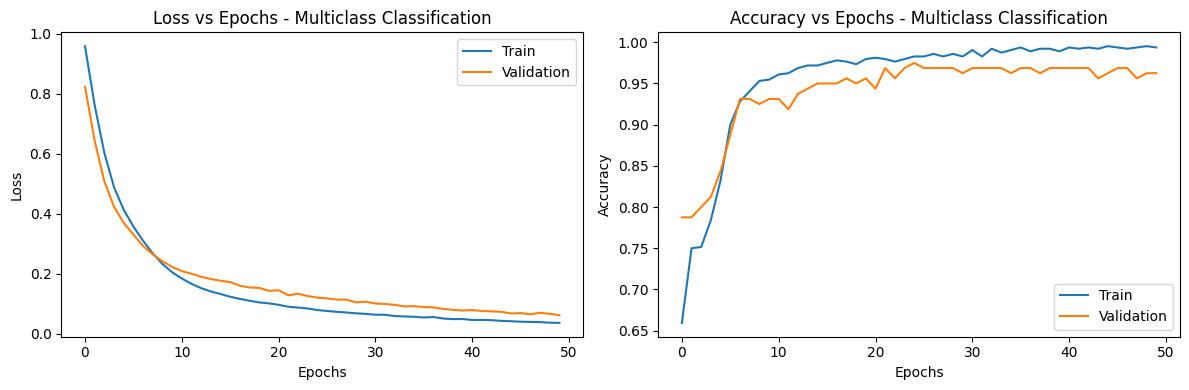

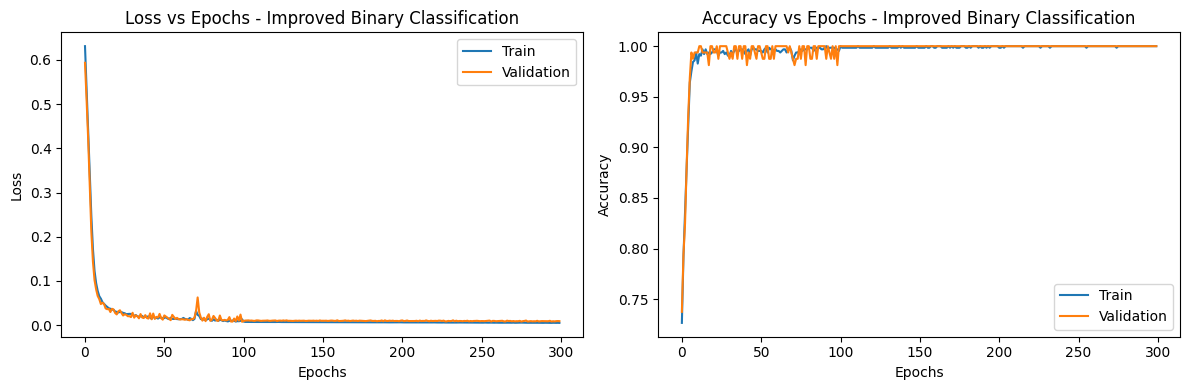

7/7 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 1.0000
[0.035742975771427155, 1.0] - binary 
 [0.07039035856723785, 0.9850000143051147] - multi 
 [0.010638674721121788, 1.0] - binary_2


In [ ]:
# Візуалізація результатів
plot_history(history_binary, 'Binary Classification')
plot_history(history_multi, 'Multiclass Classification')
plot_history(history_binary_improved, 'Improved Binary Classification')
print(model_binary.evaluate(X[800:],  y_binary[800:]),"- binary \n", model_multi.evaluate(X[800:], y_multi[800:]),"- multi \n", model_binary_2.evaluate(X[800:], y_binary[800:]),"- binary_2")